# DECISION TREE

## 1. Data Preparation:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease')

## 2. Exploratory Data Analysis (EDA):

In [6]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0


In [7]:
data['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


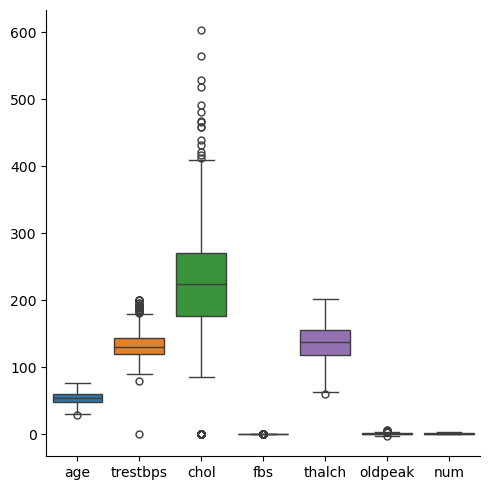

In [9]:
sns.catplot(data, kind = 'box')
plt.show()

In [10]:
num_col = data.select_dtypes(include = ['int', 'float'])
outliers = {}

for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers[col] = data[(data[col] < lower_limit) | (data[col] > upper_limit)].shape[0]

In [11]:
outliers

{'age': 1, 'trestbps': 22, 'chol': 187, 'thalch': 1, 'oldpeak': 16, 'num': 0}

In [12]:
correlation = data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']].corr()

In [13]:
correlation

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


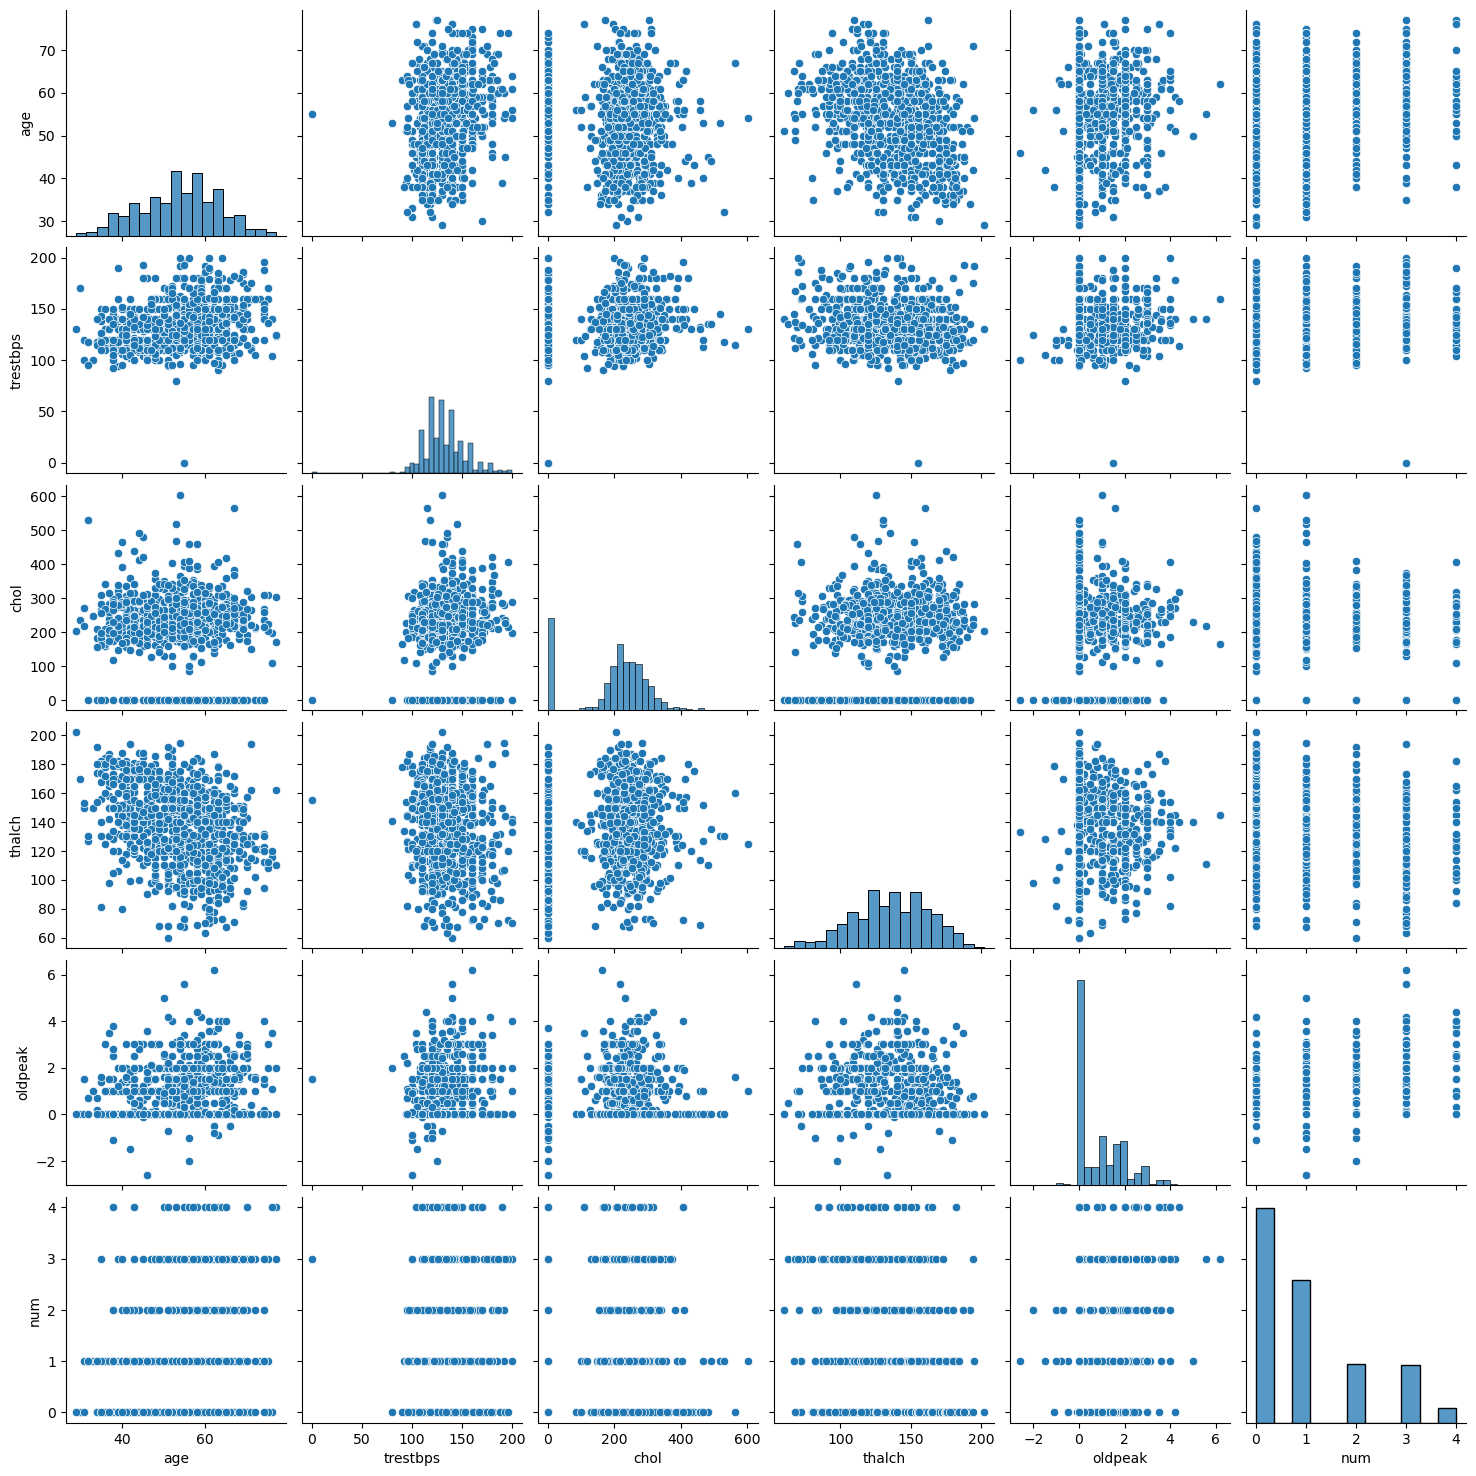

In [14]:
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']])
plt.show()

## 3. Feature Engineering:

### One-Hot Encoding

In [17]:
cat_col = data[['sex', 'cp', 'restecg', 'exang', 'slope', 'thal', 'fbs']]

In [18]:
data_encode = pd.get_dummies(cat_col).astype(int)

In [19]:
data_encode

,fbs,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0
3,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
4,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
904,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
905,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
906,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [20]:
data = data.drop(columns = cat_col)

In [21]:
data = data.join(data_encode)

In [22]:
data

,age,trestbps,chol,thalch,oldpeak,num,fbs,sex_Female,sex_Male,cp_asymptomatic,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,132,0.0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,148,0.4,0,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,190,0.0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,126,1.5,0,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,120,1.5,4,0,0,1,1,...,1,0,0,0,0,0,1,0,1,0
904,62,166,170,120,3.0,4,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
905,56,170,0,123,2.5,4,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
906,56,144,208,105,NaN,4,1,0,1,0,...,0,0,0,1,1,0,0,0,0,1


### scaling numerical features

In [24]:
num_col = data[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scale = MinMaxScaler()

In [27]:
scaled_data = scale.fit_transform(num_col)

In [28]:
scaled_data

array([[0.70833333, 0.725     , 0.38640133, 0.63380282, 0.55681818],
       [0.25      , 0.675     , 0.33665008, 0.50704225, 0.29545455],
       [0.58333333, 0.7       , 0.31840796, 0.61971831, 0.34090909],
       ...,
       [0.5625    , 0.85      , 0.        , 0.44366197, 0.57954545],
       [0.5625    , 0.72      , 0.34494196, 0.31690141,        nan],
       [0.58333333, 0.71      , 0.45936982, 0.85915493,        nan]])

In [29]:
scaled_data = pd.DataFrame(scaled_data, columns = num_col.columns)

In [30]:
data = data.drop(columns = num_col)

In [31]:
new_data = data.join(scaled_data)

In [32]:
new_data

,num,fbs,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_lv hypertrophy,restecg_normal,...,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,age,trestbps,chol,thalch,oldpeak
0,0,1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0.708333,0.725,0.386401,0.633803,0.556818
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,0.250000,0.675,0.336650,0.507042,0.295455
2,0,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,0.583333,0.700,0.318408,0.619718,0.340909
3,0,0,0,1,0,0,0,1,1,0,...,1,0,1,0,0,0.479167,0.590,0.308458,0.915493,0.295455
4,0,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,0.583333,0.550,0.333333,0.464789,0.465909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,4,0,0,1,1,0,0,0,0,1,...,0,1,0,1,0,0.500000,0.625,0.000000,0.422535,0.465909
904,4,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0.687500,0.830,0.281924,0.422535,0.636364
905,4,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0.562500,0.850,0.000000,0.443662,0.579545
906,4,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0.562500,0.720,0.344942,0.316901,NaN


## 4. Decision Tree Classification:

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
X = new_data.iloc[:, 1:26]

In [36]:
y = new_data.iloc[:,0]

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree.fit(X,y)

DecisionTreeClassifier()

In [39]:
dtree.feature_importances_

array([0.0198069 , 0.01361856, 0.01148212, 0.12303094, 0.00785377,
       0.00152172, 0.00212054, 0.01305015, 0.01660836, 0.01083554,
       0.02263913, 0.00270628, 0.00360492, 0.00472927, 0.01482474,
       0.02177408, 0.0178069 , 0.01654402, 0.01128147, 0.01179929,
       0.13891669, 0.118737  , 0.14926012, 0.15148311, 0.09396438])

In [40]:
dtree_rank = pd.DataFrame()
dtree_rank['Features'] = X.columns
dtree_rank['Importance'] = dtree.feature_importances_
dtree_rank

,Features,Importance
0,fbs,0.019807
1,sex_Female,0.013619
2,sex_Male,0.011482
3,cp_asymptomatic,0.123031
4,cp_atypical angina,0.007854
5,cp_non-anginal,0.001522
6,cp_typical angina,0.002121
7,restecg_lv hypertrophy,0.013050
8,restecg_normal,0.016608
9,restecg_st-t abnormality,0.010836


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((726, 25), (182, 25), (726,), (182,))

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
model = DecisionTreeClassifier(max_depth = 15, criterion='entropy', random_state = 42, min_samples_split=10)

In [45]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=10,
                       random_state=42)

In [46]:
yhat_train = model.predict(X_train)

In [47]:
cm = confusion_matrix(y_train, yhat_train)

In [48]:
cm

array([[284,  24,   8,   4,   0],
       [ 23, 178,   3,  10,   2],
       [ 11,  28,  47,   2,   1],
       [  6,   8,   6,  58,   3],
       [  1,   7,   1,   2,   9]], dtype=int64)

In [49]:
print(classification_report(y_train, yhat_train))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       320
           1       0.73      0.82      0.77       216
           2       0.72      0.53      0.61        89
           3       0.76      0.72      0.74        81
           4       0.60      0.45      0.51        20

    accuracy                           0.79       726
   macro avg       0.74      0.68      0.70       726
weighted avg       0.79      0.79      0.79       726



In [50]:
yhat_test = model.predict(X_test)

In [51]:
cm = confusion_matrix(y_test, yhat_test)
cm

array([[59, 14,  2,  3,  1],
       [ 7, 25,  8,  8,  1],
       [ 1, 12,  3,  3,  1],
       [ 1, 12,  8,  4,  1],
       [ 0,  4,  2,  2,  0]], dtype=int64)

In [52]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80        79
           1       0.37      0.51      0.43        49
           2       0.13      0.15      0.14        20
           3       0.20      0.15      0.17        26
           4       0.00      0.00      0.00         8

    accuracy                           0.50       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.52      0.50      0.50       182



## 5. Hyperparameter Tuning:

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [55]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 10, 20, 30, None],
    'min_samples_split': [1, 2, 5, 10, 20]
}

In [56]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [57]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                              min_samples_split=10,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, 30, None],
                         'min_samples_split': [1, 2, 5, 10, 20]},
             scoring='accuracy')

In [58]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

In [59]:
best_model = grid_search.best_estimator_

In [60]:
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [61]:
y_pred = best_model.predict(X_test)

In [62]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 3, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 1], dtype=int64)

In [63]:
accuracy_score(y_test, y_pred)

0.5824175824175825

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.80        79
           1       0.43      0.73      0.55        49
           2       0.31      0.20      0.24        20
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         8

    accuracy                           0.58       182
   macro avg       0.30      0.35      0.32       182
weighted avg       0.49      0.58      0.52       182



#### The model has an overall accuracy of 58% on the testing data.

#### Class 0 performed the best with 80% F1-score.
#### Class 1 had moderate performance with 55% F1-score.
#### Classes 2, 3, and 4 performed poorly, with F1-scores below 25%.
#### The macro average F1-score is 32%, meaning the model struggles with class balance.
#### The weighted average F1-score is 52%, indicating that performance is driven by the more frequent classes.
#### Overall, the model performs well for Class 0 but struggles with other classes, especially rare ones.

## 6. Model Evaluation and Analysis:

In [141]:
from sklearn.tree import plot_tree

In [143]:
fnames = X.head().columns
fnames

Index(['fbs', 'sex_Female', 'sex_Male', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
       'exang_False', 'exang_True', 'exang_FALSE', 'exang_TURE',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect', 'age',
       'trestbps', 'chol', 'thalch', 'oldpeak'],
      dtype='object')

In [147]:
cnames = new_data['num'].unique()
cnames

array([0, 1, 2, 3, 4], dtype=int64)

In [153]:
cnames = [str(c) for c in cnames]  # Convert class names to strings

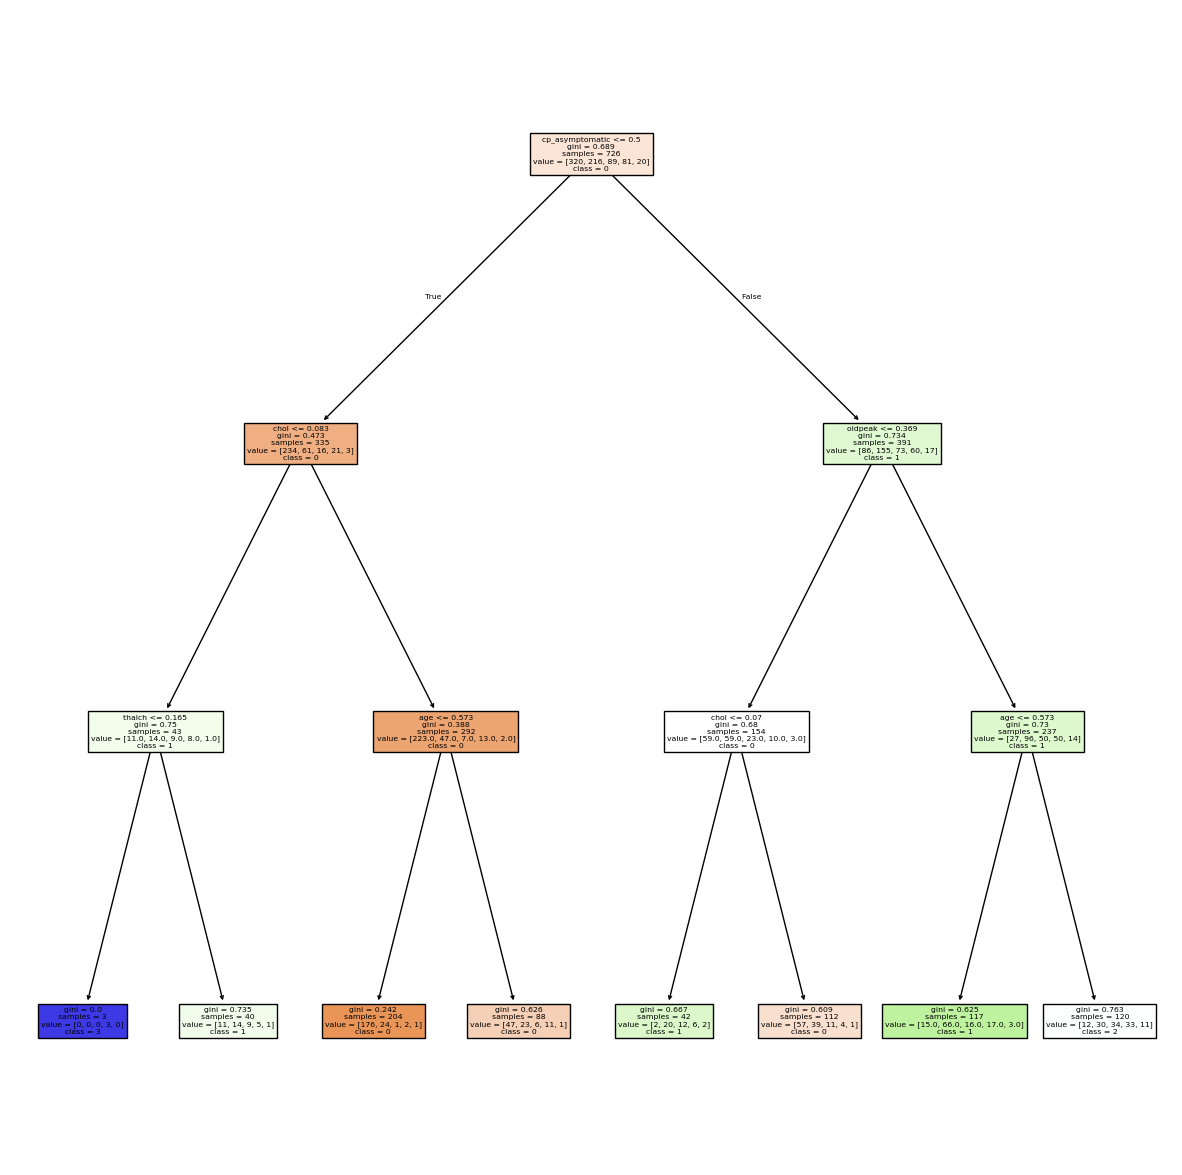

In [155]:
plt.figure(figsize=(15,15))
plot_tree(model, feature_names=fnames, class_names=cnames, filled=True )
plt.show()

## Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

#### max_depth -> Limits tree depth; prevents overfitting.
#### min_samples_split -> Minimum samples to split a node; higher values make the model more general.
#### min_samples_leaf -> Minimum samples in a leaf; avoids small, noisy branches.
#### criterion -> Splitting method: "gini" (faster) or "entropy" (more balanced splits).
#### max_features -> Number of features used for splitting; reduces overfitting.


### 2. What is the difference between the Label encoding and One-hot encoding?

#### Label Encoding -> Converts categories to numbers (e.g., "Red" -> 0, "Blue" -> 1); useful for ordered data.
#### One-Hot Encoding -> Creates separate binary columns for each category (e.g., "Red" -> [1, 0, 0]`); better for unordered data.